In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define autoencoder architecture
class Autoencoder(models.Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(128, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate and compile the autoencoder model
autoencoder = Autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))


2024-04-15 10:03:03.118028: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 10:03:03.118115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 10:03:03.273393: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
 77/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4126

I0000 00:00:1713175401.645456      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713175401.661346      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2497

W0000 00:00:1713175404.046051      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713175404.721788      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2495 - val_loss: 0.1191
Epoch 2/10
 81/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1194

W0000 00:00:1713175405.303230      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1150 - val_loss: 0.1012
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1006 - val_loss: 0.0939
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0939 - val_loss: 0.0901
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0901 - val_loss: 0.0868
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0874 - val_loss: 0.0847
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0853 - val_loss: 0.0836
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0833 - val_loss: 0.0819
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0821 - val_loss: 0.0811
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0812 - val_loss: 0.0798


In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Variational Autoencoder architecture
class VAE(models.Model):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(latent_dim + latent_dim)  # mean and log-variance
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(128, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])

    def call(self, x):
        # Encode input into mean and log-variance
        encoded = self.encoder(x)
        mean, log_var = tf.split(encoded, num_or_size_splits=2, axis=1)
        # Reparameterization trick
        epsilon = tf.random.normal(tf.shape(mean))
        z = mean + tf.exp(0.5 * log_var) * epsilon
        # Decode
        decoded = self.decoder(z)
        return decoded, mean, log_var

# Instantiate and compile the VAE model
latent_dim = 32  # Adjust latent dimension as needed
vae = VAE(latent_dim)
vae.compile(optimizer='adam', loss='binary_crossentropy')

# Train the VAE
vae.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/10
 66/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4196

W0000 00:00:1713175420.482988      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2479

W0000 00:00:1713175422.911186      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713175423.706991      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.2477 - val_loss: 0.1164
Epoch 2/10
 61/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1167

W0000 00:00:1713175424.315480      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1114 - val_loss: 0.0990
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0989 - val_loss: 0.0941
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0930 - val_loss: 0.0891
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0894 - val_loss: 0.0866
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0870 - val_loss: 0.0850
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0850 - val_loss: 0.0832
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0835 - val_loss: 0.0819
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0822 - val_loss: 0.0810
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0812 - val_loss: 0.0803


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0803 - val_loss: 0.0792
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0794 - val_loss: 0.0784
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0786 - val_loss: 0.0778
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0782 - val_loss: 0.0775
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0777 - val_loss: 0.0771
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0772 - val_loss: 0.0767
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0768 - val_loss: 0.0762
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0763 - val_loss: 0.0758
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0760 - val_loss: 0.0754
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0759 - val_loss: 0.0755
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0805 - val_loss: 0.0798
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

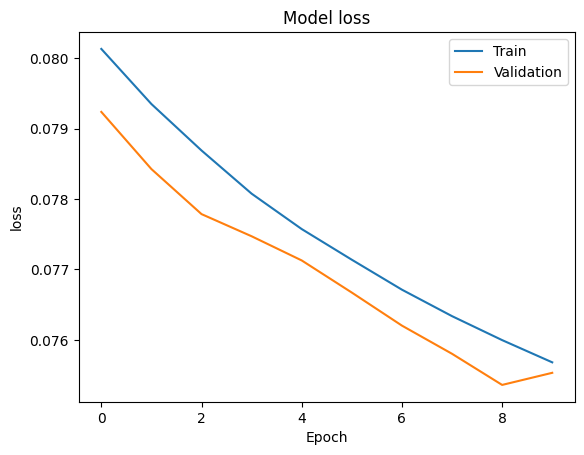

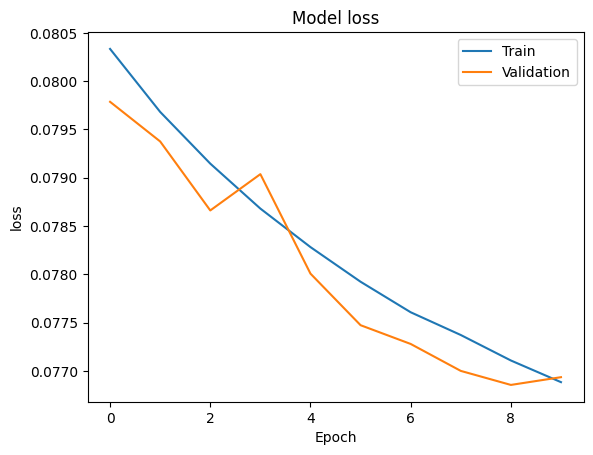

In [4]:
import matplotlib.pyplot as plt

autoencoder_history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
vae_history = vae.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))


# Plot loss and other metrics
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.title('Model ' + metric)
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Plot loss for autoencoder
plot_metrics(autoencoder_history, 'loss')

# Plot loss for VAE
plot_metrics(vae_history, 'loss')



/tmp/ipykernel_34/2390881021.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], cmap='viridis')


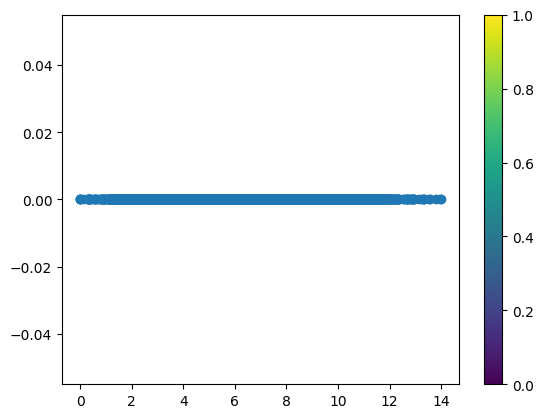

/tmp/ipykernel_34/2390881021.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], cmap='viridis')


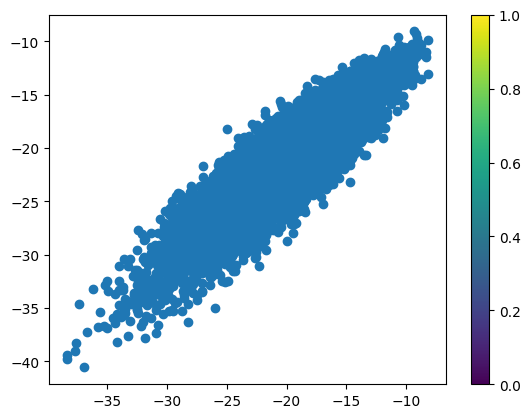

In [6]:
# For autoencoder
encoded_imgs = autoencoder.encoder(x_test).numpy()
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], cmap='viridis')
plt.colorbar()
plt.show()

# For VAE
_, _, encoded_imgs = vae(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], cmap='viridis')
plt.colorbar()
plt.show()


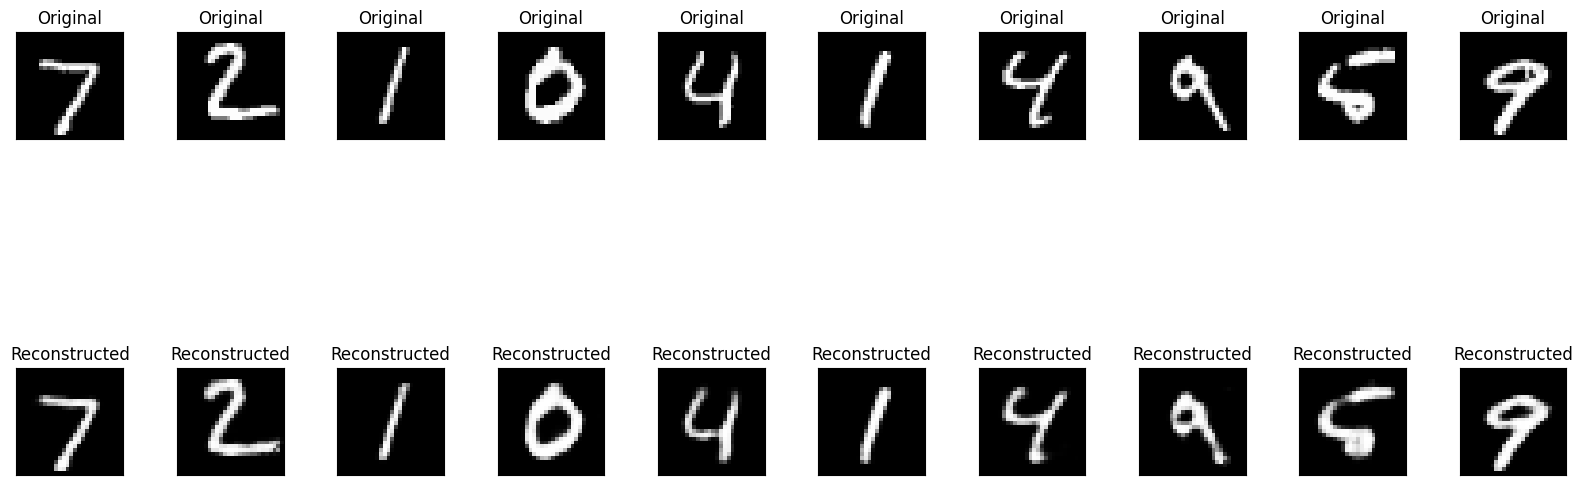

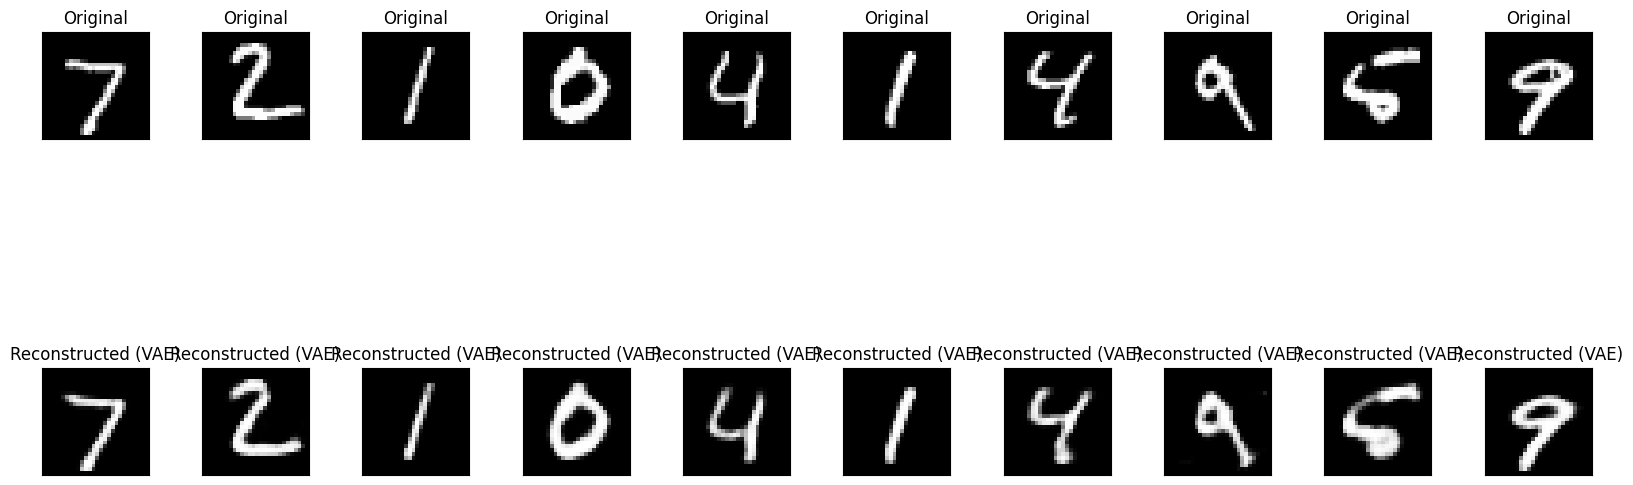

In [8]:
# For autoencoder
decoded_imgs = autoencoder(x_test).numpy()

n = 10  # Number of images to display
plt.figure(figsize=(20, 8))  # Adjust figure size and spacing
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing between subplots
plt.show()

# For VAE
decoded_imgs_vae, _, _ = vae(x_test)
decoded_imgs_vae = decoded_imgs_vae.numpy()

plt.figure(figsize=(20, 8))  # Adjust figure size and spacing
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_vae[i])
    plt.title("Reconstructed (VAE)")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing between subplots
plt.show()
